In [1]:
import pandas as pd
import json
import os
from pandas.io.json import json_normalize
import numpy as np
import scipy
pd.options.display.float_format = '{:.2f}'.format


In [2]:
path = 'output/evaluation/EvaluateTestSetPredictions/results/'
PATH_TRAIN = "output/models/"

In [3]:
paths = []
models = []

for root, dirs, files in os.walk(path):
    if "/results" in root and "Evaluate" in root:
        for d in dirs:
            paths.append(os.path.join(root, d))
            models.append(d)  # .replace("_"+d.split("_")[-1], "")

results =  dict(zip(models, paths))
results


def fetch_training_path():
    paths = []
    models = []
    for root, dirs, files in os.walk(PATH_TRAIN):
        if "/results" in root:
            for d in dirs:
                paths.append(os.path.join(root, d))
                models.append(d)

    return dict(zip(models, paths))

In [4]:
def json2df(paths, file, idx):
    data = []
    for model, path in paths.items():
        file_path = os.path.join(path, file)
        try:
            with open(file_path) as json_file:
                d = json.load(json_file)
                d["path"] = path.split("/")[-1]
                d["model"] = d["path"].replace("_" + d["path"].split("_")[-1], "")

                data.append(d)
        except:
            data.append({"path": path.split("/")[-1]})

    df = pd.DataFrame.from_dict(json_normalize(data), orient="columns")

    df = df.set_index(idx)

    return df

In [5]:
metrics = json2df(results, "metrics.json", "path")
metrics

,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,coverage_at_20,model
path,,,,,,,,,,,,,,
SupervisedModelTraining____mars_gym_model_b____1026d1d9a0_ba45488153,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.31,0.35,0.38,0.40,0.41,0.45,0.12,0.39,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____3e8c4fc642_54758f3787,SupervisedModelTraining____mars_gym_model_b___...,1883,0.46,0.38,0.43,0.45,0.48,0.51,0.53,0.54,0.57,0.17,0.51,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____5b5a3c6223_d25898f4a1,SupervisedModelTraining____mars_gym_model_b___...,1883,0.47,0.40,0.45,0.46,0.49,0.52,0.54,0.54,0.58,0.18,0.52,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____fbe36bd7f0_fd5021c7b1,SupervisedModelTraining____mars_gym_model_b___...,1883,0.38,0.30,0.35,0.36,0.39,0.42,0.44,0.45,0.49,0.15,0.44,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____00b542c7e1_1aacd40e01,SupervisedModelTraining____mars_gym_model_b___...,1883,0.44,0.37,0.42,0.43,0.46,0.49,0.50,0.51,0.55,0.16,0.45,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____bca3507bbe_745bfcad60,SupervisedModelTraining____mars_gym_model_b___...,1946,0.40,0.32,0.37,0.38,0.42,0.45,0.47,0.48,0.52,0.14,0.43,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____9c9810f949_5d13935980,SupervisedModelTraining____mars_gym_model_b___...,1883,0.45,0.38,0.43,0.44,0.48,0.50,0.52,0.53,0.56,0.15,0.47,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____1f26552242_54ffd56c34,SupervisedModelTraining____mars_gym_model_b___...,1883,0.38,0.30,0.35,0.36,0.40,0.43,0.44,0.46,0.49,0.14,0.44,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____f99cd7564a_efd3bb51a8,SupervisedModelTraining____mars_gym_model_b___...,1883,0.40,0.33,0.37,0.38,0.41,0.44,0.46,0.47,0.51,0.16,0.46,SupervisedModelTraining____mars_gym_model_b___...


In [6]:
metrics.shape

(55, 14)

In [7]:
params = json2df(fetch_training_path(), "params.json", "path")
params.head()

,project,sample_size,minimum_interactions,session_test_size,test_size,dataset_split_method,test_split_type,val_size,n_splits,split_index,...,recommender_extra_params.n_hid,recommender_extra_params.n_head,recommender_extra_params.n_layers,recommender_extra_params.num_filters,recommender_extra_params.dropout,recommender_extra_params.hist_size,recommender_extra_params.from_index_mapping,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,optimizer_params.weight_decay
path,,,,,,,,,,,,,,,,,,,,,
TripletPredTraining____mars_gym_model_b____8ce48bf1d3,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan
TripletPredTraining____mars_gym_model_b____665529b96f,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan
TripletPredTraining____mars_gym_model_b____eaedda551e,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan
TripletPredTraining____mars_gym_model_b____6f2c07183c,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan
TripletPredTraining____mars_gym_model_b____1f89d23b3c,diginetica.config.diginetica_interaction,-1.00,5.00,0.10,0.20,column,time,0.20,5.00,0.00,...,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan


In [8]:
params.iloc[0]

project                                                                diginetica.config.diginetica_interaction
sample_size                                                                                               -1.00
minimum_interactions                                                                                       5.00
session_test_size                                                                                          0.10
test_size                                                                                                  0.20
dataset_split_method                                                                                     column
test_split_type                                                                                            time
val_size                                                                                                   0.20
n_splits                                                                                                

In [9]:
params.shape

(72, 55)

In [10]:
metrics

,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,ndcg_at_20,ndcg_at_50,coverage_at_5,coverage_at_20,model
path,,,,,,,,,,,,,,
SupervisedModelTraining____mars_gym_model_b____1026d1d9a0_ba45488153,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.31,0.35,0.38,0.40,0.41,0.45,0.12,0.39,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____3e8c4fc642_54758f3787,SupervisedModelTraining____mars_gym_model_b___...,1883,0.46,0.38,0.43,0.45,0.48,0.51,0.53,0.54,0.57,0.17,0.51,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____5b5a3c6223_d25898f4a1,SupervisedModelTraining____mars_gym_model_b___...,1883,0.47,0.40,0.45,0.46,0.49,0.52,0.54,0.54,0.58,0.18,0.52,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____fbe36bd7f0_fd5021c7b1,SupervisedModelTraining____mars_gym_model_b___...,1883,0.38,0.30,0.35,0.36,0.39,0.42,0.44,0.45,0.49,0.15,0.44,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____00b542c7e1_1aacd40e01,SupervisedModelTraining____mars_gym_model_b___...,1883,0.44,0.37,0.42,0.43,0.46,0.49,0.50,0.51,0.55,0.16,0.45,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____bca3507bbe_745bfcad60,SupervisedModelTraining____mars_gym_model_b___...,1946,0.40,0.32,0.37,0.38,0.42,0.45,0.47,0.48,0.52,0.14,0.43,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____9c9810f949_5d13935980,SupervisedModelTraining____mars_gym_model_b___...,1883,0.45,0.38,0.43,0.44,0.48,0.50,0.52,0.53,0.56,0.15,0.47,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____1f26552242_54ffd56c34,SupervisedModelTraining____mars_gym_model_b___...,1883,0.38,0.30,0.35,0.36,0.40,0.43,0.44,0.46,0.49,0.14,0.44,SupervisedModelTraining____mars_gym_model_b___...
SupervisedModelTraining____mars_gym_model_b____f99cd7564a_efd3bb51a8,SupervisedModelTraining____mars_gym_model_b___...,1883,0.40,0.33,0.37,0.38,0.41,0.44,0.46,0.47,0.51,0.16,0.46,SupervisedModelTraining____mars_gym_model_b___...


## Data

In [11]:
df = metrics.reset_index().merge(params.reset_index(), left_on='model_task', right_on='path')
df['model_class'] = df.apply(lambda row: str(row['model_task']).split("_")[0] + "."+str(row['recommender_module_class']), axis=1)
df.head()

,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.n_head,recommender_extra_params.n_layers,recommender_extra_params.num_filters,recommender_extra_params.dropout,recommender_extra_params.hist_size,recommender_extra_params.from_index_mapping,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,optimizer_params.weight_decay,model_class
0,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.31,0.35,0.38,0.40,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
1,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.25,0.32,0.33,0.38,0.41,0.43,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
2,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.26,0.31,0.32,0.35,0.39,0.40,...,4.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
3,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.32,0.35,0.39,0.41,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
4,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.36,0.29,0.34,0.35,0.38,0.41,0.42,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,SupervisedModelTraining.nan


In [12]:
df.shape
df

,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.n_head,recommender_extra_params.n_layers,recommender_extra_params.num_filters,recommender_extra_params.dropout,recommender_extra_params.hist_size,recommender_extra_params.from_index_mapping,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,optimizer_params.weight_decay,model_class
0,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.31,0.35,0.38,0.40,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
1,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.25,0.32,0.33,0.38,0.41,0.43,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
2,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.26,0.31,0.32,0.35,0.39,0.40,...,4.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
3,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.32,0.35,0.39,0.41,...,2.00,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel
4,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.36,0.29,0.34,0.35,0.38,0.41,0.42,...,nan,nan,nan,nan,nan,NaN,NaN,NaN,nan,SupervisedModelTraining.nan


In [13]:
df.columns


Index(['path_x', 'model_task', 'count', 'mean_average_precision',
       'precision_at_1', 'mrr_at_5', 'mrr_at_10', 'ndcg_at_5', 'ndcg_at_10',
       'ndcg_at_15', 'ndcg_at_20', 'ndcg_at_50', 'coverage_at_5',
       'coverage_at_20', 'model_x', 'path_y', 'project', 'sample_size',
       'minimum_interactions', 'session_test_size', 'test_size',
       'dataset_split_method', 'test_split_type', 'val_size', 'n_splits',
       'split_index', 'sampling_strategy', 'balance_fields',
       'use_sampling_in_validation', 'seed', 'observation',
       'load_index_mapping_path', 'negative_proportion', 'device',
       'batch_size', 'epochs', 'optimizer', 'learning_rate', 'loss_function',
       'gradient_norm_clipping', 'gradient_norm_clipping_type',
       'early_stopping_patience', 'early_stopping_min_delta', 'monitor_metric',
       'monitor_mode', 'generator_workers', 'pin_memory', 'run_evaluate',
       'sample_size_eval', 'metrics', 'bandit_policy_class',
       'recommender_module_class', 

In [14]:
df['triplet_path'] = df['path_item_embedding'].apply(lambda x: str(x).split("/")[-2] if len(str(x).split("/")) > 2 else "")

In [15]:
df.columns

Index(['path_x', 'model_task', 'count', 'mean_average_precision',
       'precision_at_1', 'mrr_at_5', 'mrr_at_10', 'ndcg_at_5', 'ndcg_at_10',
       'ndcg_at_15', 'ndcg_at_20', 'ndcg_at_50', 'coverage_at_5',
       'coverage_at_20', 'model_x', 'path_y', 'project', 'sample_size',
       'minimum_interactions', 'session_test_size', 'test_size',
       'dataset_split_method', 'test_split_type', 'val_size', 'n_splits',
       'split_index', 'sampling_strategy', 'balance_fields',
       'use_sampling_in_validation', 'seed', 'observation',
       'load_index_mapping_path', 'negative_proportion', 'device',
       'batch_size', 'epochs', 'optimizer', 'learning_rate', 'loss_function',
       'gradient_norm_clipping', 'gradient_norm_clipping_type',
       'early_stopping_patience', 'early_stopping_min_delta', 'monitor_metric',
       'monitor_mode', 'generator_workers', 'pin_memory', 'run_evaluate',
       'sample_size_eval', 'metrics', 'bandit_policy_class',
       'recommender_module_class', 

In [17]:
df = df[df['project'] == 'mercado_livre.config.mercado_livre_transformer']
df.shape

(4, 73)

In [18]:
df.sort_values(['ndcg_at_10'], ascending=False).head(10)

,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.n_layers,recommender_extra_params.num_filters,recommender_extra_params.dropout,recommender_extra_params.hist_size,recommender_extra_params.from_index_mapping,recommender_extra_params.path_item_embedding,recommender_extra_params.freeze_embedding,optimizer_params.weight_decay,model_class,triplet_path
1,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.25,0.32,0.33,0.38,0.41,0.43,...,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel,
2,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.34,0.26,0.31,0.32,0.35,0.39,0.40,...,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel,
3,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.32,0.35,0.39,0.41,...,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel,
0,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1946,0.33,0.25,0.30,0.31,0.35,0.38,0.40,...,1.00,100.00,0.20,30.00,False,False,False,0.00,SupervisedModelTraining.model.MLTransformerModel,


path_x                           SupervisedModelTraining____mars_gym_model_b___...
model_task                       SupervisedModelTraining____mars_gym_model_b___...
count                                                                         1883
mean_average_precision                                                        0.51
precision_at_1                                                                0.44
                                                       ...                        
recommender_extra_params.p_d                                                   NaN
recommender_extra_params.p_nh                                                  NaN
recommender_extra_params.p_nv                                                  NaN
model_class                       SupervisedModelTraining.model.MLTransformerModel
triplet_path                                                                      
Name: 14, Length: 80, dtype: object

In [95]:
import plotly.express as px

columns = {
    'recommender_extra_params.n_hid': 'n_hid',
    'recommender_extra_params.n_head': 'n_head',
    'recommender_extra_params.n_layers': 'n_layers',
    'recommender_extra_params.num_filters': "num_filters",
    'recommender_extra_params.dropout': "dropout",
    'recommender_extra_params.hist_size': "hist_size",
    'optimizer_params.weight_decay': "WeightDecay",
}

# df = df.sort_values(['data_frames_preparation_extra_params.max_itens_per_session_y', 
#                      'data_frames_preparation_extra_params.max_relative_pos_y',
#                      'data_frames_preparation_extra_params.pos_max_deep_y',
#                      'data_frames_preparation_extra_params.filter_first_interaction_y'])

fig = px.parallel_categories(df, dimensions=list(columns.keys()),
                color="ndcg_at_10", 
                color_continuous_scale=px.colors.sequential.YlOrRd,
                labels=columns)
fig.show()

In [115]:
df.sort_values(['ndcg_at_10'], ascending=False).iloc[0][columns.keys()]

recommender_extra_params.n_hid          50.00
recommender_extra_params.n_head          4.00
recommender_extra_params.n_layers        1.00
recommender_extra_params.num_filters   100.00
recommender_extra_params.dropout         0.20
recommender_extra_params.hist_size      30.00
optimizer_params.weight_decay            0.00
Name: 25, dtype: object

In [66]:
df.merge(params.reset_index(), left_on='model_task', right_on='path', how='left')


,path_x,model_task,count,mean_average_precision,precision_at_1,mrr_at_5,mrr_at_10,ndcg_at_5,ndcg_at_10,ndcg_at_15,...,recommender_extra_params.n_head,recommender_extra_params.num_filters,recommender_extra_params.hist_size,optimizer_params.weight_decay,recommender_extra_params.num_blocks,recommender_extra_params.num_heads,recommender_extra_params.p_L,recommender_extra_params.p_d,recommender_extra_params.p_nh,recommender_extra_params.p_nv
0,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.47,0.40,0.45,0.46,0.49,0.52,0.54,...,2.00,200.00,20.00,0.00,nan,nan,nan,nan,nan,nan
1,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.44,0.37,0.42,0.43,0.46,0.49,0.50,...,4.00,50.00,20.00,0.00,nan,nan,nan,nan,nan,nan
2,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.45,0.38,0.43,0.44,0.48,0.50,0.52,...,1.00,50.00,10.00,0.00,nan,nan,nan,nan,nan,nan
3,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.40,0.33,0.37,0.38,0.41,0.44,0.46,...,1.00,50.00,10.00,0.00,nan,nan,nan,nan,nan,nan
4,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.43,0.36,0.41,0.41,0.45,0.48,0.49,...,4.00,100.00,20.00,0.00,nan,nan,nan,nan,nan,nan
5,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.36,0.29,0.33,0.34,0.37,0.40,0.42,...,2.00,50.00,30.00,0.00,nan,nan,nan,nan,nan,nan
6,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.45,0.38,0.43,0.44,0.47,0.50,0.51,...,2.00,10.00,30.00,0.00,nan,nan,nan,nan,nan,nan
7,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.44,0.36,0.42,0.43,0.47,0.50,0.51,...,2.00,10.00,20.00,0.00,nan,nan,nan,nan,nan,nan
8,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.39,0.32,0.37,0.38,0.41,0.44,0.46,...,1.00,50.00,10.00,0.00,nan,nan,nan,nan,nan,nan
9,SupervisedModelTraining____mars_gym_model_b___...,SupervisedModelTraining____mars_gym_model_b___...,1883,0.41,0.34,0.38,0.40,0.43,0.46,0.48,...,1.00,100.00,30.00,0.00,nan,nan,nan,nan,nan,nan


In [67]:
#df['use_embedding'] = (df['recommender_extra_params.path_item_embedding'].fillna(False) != False)

df = df.merge(params.reset_index(), left_on='model_task', right_on='path', how='left')

columns = [
    'model_class',
    'observation_x',
    'path_x',
    'count',
    "mean_average_precision", "precision_at_1", "mrr_at_5", "ndcg_at_5", "mrr_at_10", "ndcg_at_10",
    'triplet_path'
    ]

df_metrics = df[columns]
df_metrics.head()

,model_class,observation_x,observation_x,path_x,path_x,path_x,count,mean_average_precision,precision_at_1,mrr_at_5,ndcg_at_5,mrr_at_10,ndcg_at_10,triplet_path
0,SupervisedModelTraining.model.MLTransformerModel,,NaN,SupervisedModelTraining____mars_gym_model_b___...,NaN,SupervisedModelTraining____mars_gym_model_b___...,1883,0.47,0.40,0.45,0.49,0.46,0.52,
1,SupervisedModelTraining.model.MLTransformerModel,,NaN,SupervisedModelTraining____mars_gym_model_b___...,NaN,SupervisedModelTraining____mars_gym_model_b___...,1883,0.44,0.37,0.42,0.46,0.43,0.49,
2,SupervisedModelTraining.model.MLTransformerModel,new dropout,NaN,SupervisedModelTraining____mars_gym_model_b___...,NaN,SupervisedModelTraining____mars_gym_model_b___...,1883,0.45,0.38,0.43,0.48,0.44,0.50,
3,SupervisedModelTraining.model.MLTransformerModel,without time3,NaN,SupervisedModelTraining____mars_gym_model_b___...,NaN,SupervisedModelTraining____mars_gym_model_b___...,1883,0.40,0.33,0.37,0.41,0.38,0.44,
4,SupervisedModelTraining.model.MLTransformerModel,,NaN,SupervisedModelTraining____mars_gym_model_b___...,NaN,SupervisedModelTraining____mars_gym_model_b___...,1883,0.43,0.36,0.41,0.45,0.41,0.48,


In [60]:
df_metrics = df_metrics.sort_values(["model_class","observation_x", "mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_10'])

df_metrics.sort_values(['ndcg_at_10']).style.bar(subset=["mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_5', 'mrr_at_10', 'ndcg_at_10'], 
                     align='zero', color=['#d65f5f', '#5fba7d'])


ValueError: style is not supported for non-unique indices.

In [19]:
df_metrics.sort_values(['ndcg_at_10']).iloc[-2].path_x

NameError: name 'df_metrics' is not defined

In [51]:
df_metrics[df_metrics.model_class.isin(["SupervisedModelTraining.model.NARMModel"])].shape

(12, 21)

In [53]:
# import plotly.express as px

# columns = {
#     'recommender_extra_params.hidden_size_y': "hidden_size",
#     'recommender_extra_params.n_layers_y': "n_layers",
#     'recommender_extra_params.dropout_y': "Dropout",
#     'optimizer_params.weight_decay_y': "WeightDecay"
# }

# # df = df.sort_values(['data_frames_preparation_extra_params.max_itens_per_session_y', 
# #                      'data_frames_preparation_extra_params.max_relative_pos_y',
# #                      'data_frames_preparation_extra_params.pos_max_deep_y',
# #                      'data_frames_preparation_extra_params.filter_first_interaction_y'])
# df  = df_metrics[df_metrics.model_class.isin(["SupervisedModelTraining.model.NARMModel"])]

# fig = px.parallel_categories(df, dimensions=list(columns.keys()),
#                 color="ndcg_at_10", 
#                 color_continuous_scale=px.colors.sequential.YlOrRd,
#                 labels=columns)
# fig.show()

In [48]:
df_metrics.to_csv('output/metrics.csv')

In [49]:
df  = df_metrics[df_metrics.model_class.isin(["TripletPredTraining.None"])]
print(df.shape)
df.style.bar(subset=["mean_average_precision",  "precision_at_1", 'mrr_at_5', 'ndcg_at_5', 'mrr_at_10', 'ndcg_at_10'], 
                     align='zero', color=['#d65f5f', '#5fba7d'])

(0, 20)


,model_class,observation_x,count,mean_average_precision,precision_at_1,mrr_at_5,ndcg_at_5,mrr_at_10,ndcg_at_10,triplet_path,data_frames_preparation_extra_params.sample_days_y,data_frames_preparation_extra_params.max_itens_per_session_y,data_frames_preparation_extra_params.min_itens_interactions_y,data_frames_preparation_extra_params.max_relative_pos_y,data_frames_preparation_extra_params.pos_max_deep_y,data_frames_preparation_extra_params.filter_first_interaction_y,loss_function_params.l2_reg_y,optimizer_params.weight_decay_y,recommender_extra_params.dropout_y,recommender_extra_params.negative_random_y


In [24]:
df.shape

(56, 21)

In [25]:
import plotly.express as px

columns = {
    'data_frames_preparation_extra_params.max_itens_per_session_y': 'MaxItemPerSession',
    'data_frames_preparation_extra_params.min_itens_interactions_y': 'MinItemInteraction',
    'data_frames_preparation_extra_params.max_relative_pos_y': 'MaxRelativePos',
    'data_frames_preparation_extra_params.pos_max_deep_y': "PositiveDeep",
    'data_frames_preparation_extra_params.filter_first_interaction_y': "FilterOnlyOne",
    'loss_function_params.l2_reg_y': 'L2Reg',
    'optimizer_params.weight_decay_y': "WeightDecay",
    'recommender_extra_params.dropout_y': "Dropout",
    'recommender_extra_params.negative_random_y': "NegativeRandom"
}

# df = df.sort_values(['data_frames_preparation_extra_params.max_itens_per_session_y', 
#                      'data_frames_preparation_extra_params.max_relative_pos_y',
#                      'data_frames_preparation_extra_params.pos_max_deep_y',
#                      'data_frames_preparation_extra_params.filter_first_interaction_y'])

fig = px.parallel_categories(df, dimensions=list(columns.keys()),
                color="mean_average_precision", 
                color_continuous_scale=px.colors.sequential.YlOrRd,
                labels=columns)
fig.show()

In [21]:
df.iloc[-1]

model_class                                                                                 TripletPredTraining.None
observation_x                                                                                                       
use_embedding                                                                                                  False
count                                                                                                           3129
mean_average_precision                                                                                          0.64
precision_at_1                                                                                                  0.53
mrr_at_5                                                                                                        0.63
ndcg_at_5                                                                                                       0.73
mrr_at_10                                                       

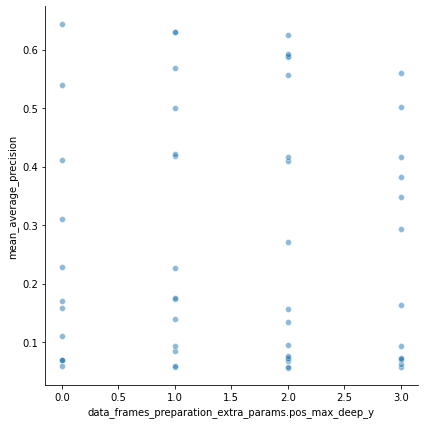

In [22]:
import seaborn as sns
#data_frames_preparation_extra_params.max_relative_pos_y
# Plot miles per gallon against horsepower with other semantics
sns.relplot(y="mean_average_precision", 
            x="data_frames_preparation_extra_params.pos_max_deep_y", 
            alpha=.5, 
            height=6, data=df)

In [23]:
import plotly.express as px
fig = px.scatter(df, 
                 x="data_frames_preparation_extra_params.max_relative_pos_y", 
                 y="data_frames_preparation_extra_params.pos_max_deep_y",
                size="mean_average_precision")
fig.show()